In [1]:
!pip install mss
!pip install matplotlib

In [15]:
# debug
import time
import random
from IPython.display import clear_output

### get_frame

In [3]:
from win32gui import FindWindow, GetWindowRect, SetForegroundWindow, GetForegroundWindow, GetWindowText
import win32com.client

shell = win32com.client.Dispatch("WScript.Shell")

# FindWindow takes the Window Class name (can be None if unknown), and the window's display text. 
window_handle = FindWindow(None, "game - Snes9x 1.62.3")
window_rect   = GetWindowRect(window_handle)
print(window_rect)
window_offset = (20, 50, -20, -50)

window_rect = tuple(p + o for p, o in zip(window_rect, window_offset))

print(window_rect)
#(0, 0, 800, 600)


(1181, 353, 1701, 852)
(1201, 403, 1681, 802)


In [19]:
import mss.tools, numpy as np
from matplotlib import pyplot as plt

def set_foreground_game():
    shell.SendKeys('%')
    SetForegroundWindow(window_handle)

def get_frame():
    with mss.mss() as sct:
        img = sct.grab(window_rect)
    return np.array(img)

329456


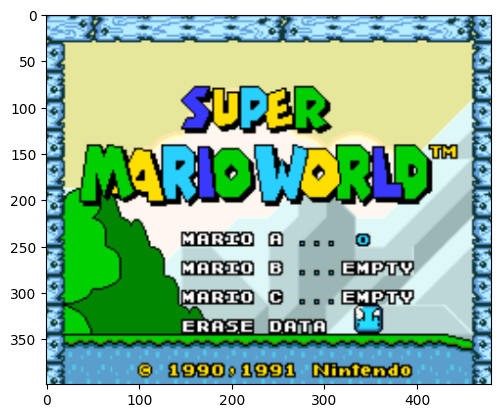

In [5]:
frame = get_frame()
plt.imshow(frame)

### env

In [44]:
import win32api, win32con

VK_CODE = {
    'c': 0x43,
    'left_arrow':0x25,
    'up_arrow':0x26,
    'right_arrow':0x27,
    'down_arrow':0x28,
    'x':0x58,
}

class GameController:
    def __init__(self):
        pass

    def action(self, input):
        
        if GetForegroundWindow() != window_handle:
            raise Exception(f"{GetWindowText(window_handle)} cannot be minimized.") 

        if input[0] > 0.5:
            press = 'right_arrow'
            release = 'left_arrow'
            win32api.keybd_event(VK_CODE[release], win32api.MapVirtualKey(VK_CODE[release], 0), win32con.KEYEVENTF_KEYUP, 0)
            win32api.keybd_event(VK_CODE[press], win32api.MapVirtualKey(VK_CODE[press], 0), 0, 0)
        else:
            press = 'left_arrow'
            release = 'right_arrow'
            win32api.keybd_event(VK_CODE[release], win32api.MapVirtualKey(VK_CODE[release], 0), win32con.KEYEVENTF_KEYUP, 0)
            win32api.keybd_event(VK_CODE[press], win32api.MapVirtualKey(VK_CODE[press], 0), 0, 0)
        
        i = 'c'
        win32api.keybd_event(VK_CODE[i], win32api.MapVirtualKey(VK_CODE[i], 0), 0, 0) if input[1] > 0.5 else win32api.keybd_event(VK_CODE[i], win32api.MapVirtualKey(VK_CODE[i], 0), win32con.KEYEVENTF_KEYUP, 0)
        
        i = 'x'
        win32api.keybd_event(VK_CODE[i], win32api.MapVirtualKey(VK_CODE[i], 0), 0, 0) if input[2] > 0.5 else win32api.keybd_event(VK_CODE[i], win32api.MapVirtualKey(VK_CODE[i], 0), win32con.KEYEVENTF_KEYUP, 0)


        return [
            get_frame(), # obs
            0, # reward
            False, # game_over
        ]


controller = GameController()

set_foreground_game()
while(True):
    time.sleep(1)
    clear_output()
    actions = [
        random.random(),
        random.random(),
        random.random()
    ]
    print(actions)
    obs, reward, game_over = controller.action(actions)
    print(game_over)

[0.49928163214208743, 0.11577666573999701, 0.5338256048936085]
False


KeyboardInterrupt: 